In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import fastai
import pandas as pd
import torch


from fastai.imports import *
from fastai.vision import *
from fastai.vision.all import *
from torchvision.models import vgg16_bn
from torchvision import datasets, transforms
from fastai.metrics import error_rate

In [3]:
torch.cuda.get_device_name(0)

'Tesla P100-PCIE-16GB'

In [4]:
bs = 64

In [5]:
## Defining Directories
work_dir = Path('/kaggle/working/')
path = Path('../input/hotel-id-2021-fgvc8')
train_img = path/ '/train_images'
test_img =  path/'/test_images'

labels = path/'train.csv'

## Reading csv
train_data = pd.read_csv(labels)

train_data.head()

,image,chain,hotel_id,timestamp
0,8000d59f6a3d765f.jpg,85,24607,2018-11-28 05:42:31
1,8000febe81817f7f.jpg,6,25389,2017-01-01 07:01:46
2,80053befc2d42fba.jpg,3,672,2018-01-26 13:22:07
3,8007fa0a8fe89f9d.jpg,5,63866,2020-07-03 02:31:31
4,800a4a6b6f6d2df6.jpg,0,12036,2017-09-22 17:59:22


In [6]:
!ls ../input/hotel-id-2021-fgvc8/train_images/

0   13	20  25	3   34	39  44	49  53	58  62	67  71	76  80	85  9
1   16	21  26	30  35	4   45	5   54	59  63	68  72	77  81	86  90
10  17	22  27	31  36	40  46	50  55	6   64	69  73	78  82	87  91
11  18	23  28	32  37	41  47	51  56	60  65	7   74	79  83	88
12  2	24  29	33  38	42  48	52  57	61  66	70  75	8   84	89


In [7]:
!du -hs ../input/hotel-id-2021-fgvc8/*

4.0K	../input/hotel-id-2021-fgvc8/sample_submission.csv
1.4M	../input/hotel-id-2021-fgvc8/test_images
4.6M	../input/hotel-id-2021-fgvc8/train.csv
25G	../input/hotel-id-2021-fgvc8/train_images


In [8]:
!ls

__notebook__.ipynb


In [9]:
!ls ../input/hotel-id-2021-fgvc8/train_images/0/d13e6ec41f486687.jpg

../input/hotel-id-2021-fgvc8/train_images/0/d13e6ec41f486687.jpg


In [10]:
!pwd


/kaggle/working


In [11]:
!ls /kaggle/working/train

ls: cannot access '/kaggle/working/train': No such file or directory


In [12]:
#!for i in {0..91}; do mkdir /kaggle/working/train/$i ; done

In [13]:
!ls /kaggle/working/train/

ls: cannot access '/kaggle/working/train/': No such file or directory


In [14]:
# !find . -iname '*.jpg' -exec convert \{} -resize 224x224! /kaggle/working/train/\{} \;

In [15]:
!cd /kaggle/working/; tar cvfz train_imgs_224x224.tgz ./train

tar: ./train: Cannot stat: No such file or directory
tar: Exiting with failure status due to previous errors


In [16]:
!du -hs /kaggle/working/train_imgs_224x224.tgz

4.0K	/kaggle/working/train_imgs_224x224.tgz


In [17]:
!ls -als /kaggle/working/train_imgs_224x224.tgz

4 -rw-r--r-- 1 root root 45 Apr 23 10:32 /kaggle/working/train_imgs_224x224.tgz


In [18]:
data = ImageDataLoaders.from_folder(path,
                                    valid_pct=0.2,
                                    item_tfms=Resize(224),
                                    batch_tfms=aug_transforms(),
                                    bs=bs,
                                    device="cuda"
                                   )

In [19]:
data.valid_ds.items[0:3]

[Path('../input/hotel-id-2021-fgvc8/train_images/79/b6864991fdd2e825.jpg'),
 Path('../input/hotel-id-2021-fgvc8/train_images/6/f53fc0f82f103d82.jpg'),
 Path('../input/hotel-id-2021-fgvc8/train_images/0/846c89b3e60c7be3.jpg')]

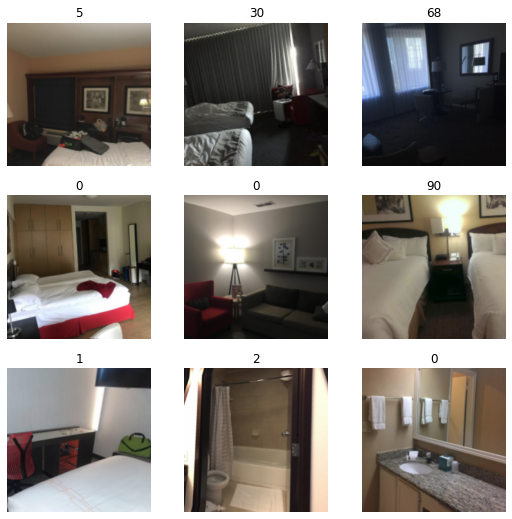

In [20]:
data.show_batch()

In [21]:
data.c

89

In [22]:
!pwd

/kaggle/working


In [23]:
learn = cnn_learner(data,
                    models.resnet50,
                    metrics=error_rate,
                    model_dir="/kaggle/working/model/"
                   )
learn.cuda();

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

In [24]:
# learn.lr_find()
# learn.recorder.plot()

In [25]:
# learn.fit_one_cycle(8)